# 3. 神經網路

我們終於要開始做生命中第一個神經網路...

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 讀入我們的 MNIST

### 1.1 由 Keras 讀入 MNIST

這次是快速版本。

In [2]:
from keras.datasets import mnist

Using Theano backend.


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

### 1.2 輸入資料整理

In [4]:
x_train = x0_train.reshape(60000, 28*28)
x_test = x0_test.reshape(10000, 28*28)

### 1.3 輸出資料整理

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y0_train,10)

In [7]:
y_test = np_utils.to_categorical(y0_test,10)

## 2. 打造第一個神經網路

這裡我們用的是 Keras 2!

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=500, input_dim=784))
model.add(Activation('sigmoid'))

In [11]:
model.add(Dense(units=500, input_dim=784))
model.add(Activation('sigmoid'))

In [12]:
model.add(Dense(units=10))
model.add(Activation('softmax'))

### 1.4 Compile

In [13]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## 1.5 學習!

In [15]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 21s - loss: 0.0091 - acc: 0.9473    
Epoch 2/20
60000/60000 [==============================] - 21s - loss: 0.0088 - acc: 0.9490    
Epoch 3/20
60000/60000 [==============================] - 20s - loss: 0.0086 - acc: 0.9501    
Epoch 4/20
60000/60000 [==============================] - 21s - loss: 0.0083 - acc: 0.9514    
Epoch 5/20
60000/60000 [==============================] - 21s - loss: 0.0081 - acc: 0.9531    
Epoch 6/20
60000/60000 [==============================] - 22s - loss: 0.0079 - acc: 0.9543    
Epoch 7/20
60000/60000 [==============================] - 22s - loss: 0.0077 - acc: 0.9551    
Epoch 8/20
60000/60000 [==============================] - 22s - loss: 0.0075 - acc: 0.9564    
Epoch 9/20
60000/60000 [==============================] - 27s - loss: 0.0074 - acc: 0.9577    
Epoch 10/20
60000/60000 [==============================] - 29s - loss: 0.0072 - acc: 0.9588    
Epoch 11/20
60000/60000 [========================

## 2. 試用我們的結果

In [16]:
from ipywidgets import interact_manual

In [17]:
result = model.predict_classes(x_test)

 9824/10000 [============================>.] - ETA: 0s

In [18]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 0


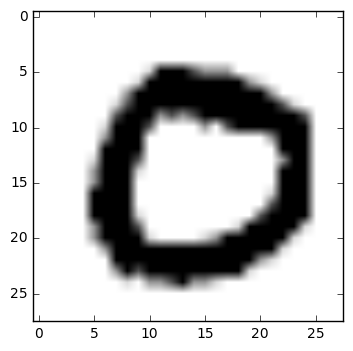

In [19]:
interact_manual(辨識, 測試編號 = (0, 9999));

## 3. 訓練好的神經網路存起來!

In [ ]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')